In [6]:
!pip install matplotlib

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.animation as animation

In [8]:
# Load sample image
IMG_PATH = 'Lena_color.png'
image = plt.imread(IMG_PATH)

In [9]:
org_img_size = os.stat(IMG_PATH).st_size/1024
print('Original image size: {0:4.4f} kB'.format(org_img_size))

Original image size: 462.7256 kB


In [10]:
image.shape[0], image.shape[1]

(512, 512)

In [29]:
# Perform PCA
compressed_image = np.zeros((*image.shape[:2], 3))
for ch in range(3):
    n_comp = 60# min(image.shape[0], image.shape[1])
    pca = PCA(n_components=n_comp) # Retain 95% of variance
    transformed_image = pca.fit_transform(image[:,:,ch])
    print('Explained variance in Ch-{0:d}: {1:4.4f}'.format(ch, sum(pca.explained_variance_ratio_)))
    
    compressed_image[:,:,ch] = pca.inverse_transform(transformed_image)
    ## image normalization
    cmin = compressed_image[:,:,ch].min()
    cmax = compressed_image[:,:,ch].max()
    compressed_image[:,:,ch] = (compressed_image[:,:,ch] - cmin)/(cmax - cmin)

Explained variance in Ch-0: 0.9822
Explained variance in Ch-1: 0.9708
Explained variance in Ch-2: 0.9436


In [30]:
# Reshape compressed image back to original shape
plt.imsave("compressed_img.png", compressed_image)
os.stat('compressed_img.png').st_size/1024

460.04296875

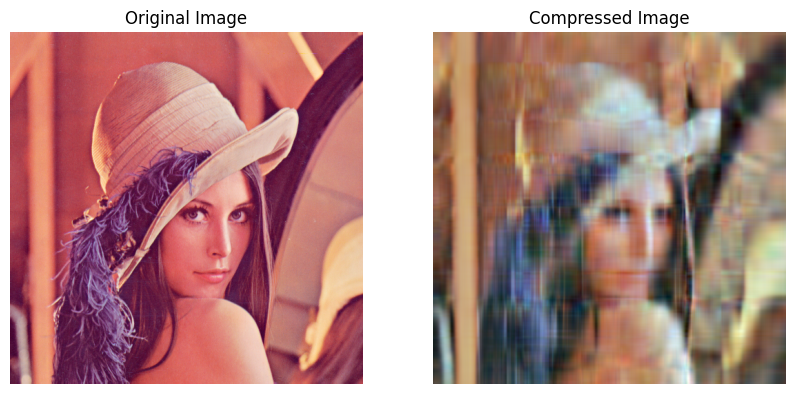

In [28]:
# Display original image
plt.figure(figsize=(10, 15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display compressed image
plt.subplot(1,2,2)
plt.imshow(compressed_image)
plt.title('Compressed Image')
plt.axis('off')
plt.show()

In [23]:
def pca_compress(n_comp, image):
    compressed_image = np.zeros((*image.shape[:2], 3))
    for ch in range(3):
#         n_comp = 60# min(image.shape[0], image.shape[1])
        pca = PCA(n_components=n_comp) # Retain 95% of variance
        transformed_image = pca.fit_transform(image[:,:,ch])
#         print('Explained variance in Ch-{0:d}: {1:4.4f}'.format(ch, sum(pca.explained_variance_ratio_)))

        compressed_image[:,:,ch] = pca.inverse_transform(transformed_image)
        ## image normalization
        cmin = compressed_image[:,:,ch].min()
        cmax = compressed_image[:,:,ch].max()
        compressed_image[:,:,ch] = (compressed_image[:,:,ch] - cmin)/(cmax - cmin)
    return np.uint8(compressed_image*255)


In [32]:
import cv2

video_name = 'output_video_fast.avi'

fps = 30 # Frames per second

# Initialize the VideoWriter object
video_writer = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), fps, image.shape[:2])

# Loop through the images and add to the video
for n_comp in range(1, 512, 1):
    frame = cv2.cvtColor(pca_compress(n_comp, image), cv2.COLOR_BGR2RGB)
    cv2.putText(frame, f'{n_comp = }', (10, 50), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 0, 0))
    video_writer.write(frame)   # Write the frame to the video

video_writer.release()

print("Video saved.")

Video saved.


In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 5.0 MB/s eta 0:00:08
    --------------------------------------- 0.6/38.6 MB 7.6 MB/s eta 0:00:05
   - -------------------------------------- 1.2/38.6 MB 9.3 MB/s eta 0:00:05
   - -------------------------------------- 1.7/38.6 MB 9.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.3/38.6 MB 10.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.6 MB 10.6 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.6 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.6 MB 11.0 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.6 MB 10.6 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.6 MB 11.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.4/38.6 MB 11.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.2/38.6 MB 11.3 MB/s eta 0:00:0